In [46]:
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv('./Data/Prepared_Data/Initial_Usernames.csv')
df.head()

,Title,Username,Rating
0,NaN,KragHag,2302
1,NaN,adhamsabary,2244
2,NaN,D33,2326
3,NaN,Leichtes_Spiel2022,2050
4,IM,Kirill_Klyukin,2640


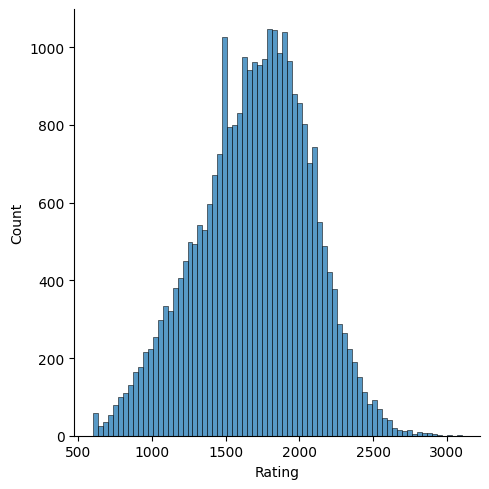

In [48]:
sns.displot(df['Rating'])

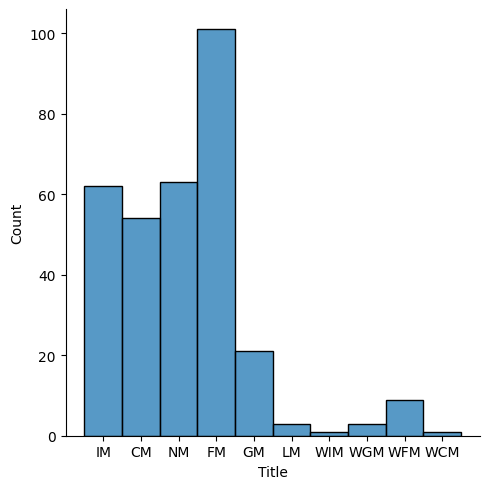

In [37]:
sns.displot(df['Title'])

In [38]:
df_titled = df[df["Title"] == "GM"]

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Title'>

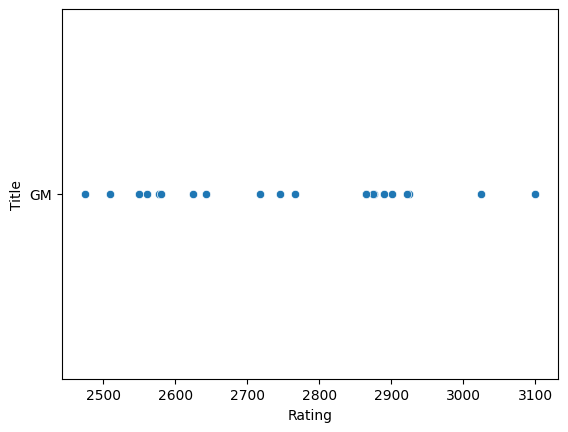

In [41]:
sns.scatterplot(df_titled['Rating'], df_titled['Title'])

In [24]:
import _utility as Util
import time

In [ ]:
new_players_set = set()
lst = pd.read_csv("Data/Prepared_Data/Usernames-2022-08-30 13:37:24.731958.csv")['Username'].tolist()

In [62]:
count = 0
big_count = 0
for username in lst:
    lst.remove(username)
    try:
        new_players = Util.scrape_n_rapid_games(username, 5,is_need_more_players=True)
    except Exception as e:
        print(e)
        continue
    if new_players is not None:
        new_players_set.update(new_players)
    
    count += 1
    if count >=10:
        big_count+=1
        count = 0
        print("{}/{} done..".format(big_count*10,len(lst))) 
        time.sleep(1)

404 Client Error: Not Found for url: https://lichess.org/api/games/user/nikenfatma?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&opening=True
404 Client Error: Not Found for url: https://lichess.org/api/games/user/AdamBoulares?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&opening=True
404 Client Error: Not Found for url: https://lichess.org/api/games/user/Shaktiva?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&opening=True
10/618 done..
404 Client Error: Not Found for url: https://lichess.org/api/games/user/Archtitan?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&opening=True
20/607 done..
404 Client Error: Not Found for url: https://lichess.org/api/games/user/SloppyPawn?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&opening=True
404 Client Error: Not Found for url: https://lichess.org/api/games/user/GeoMag3000?max=5&rated=True&perfType=rapid&analysed=True&moves=True&evals=True&op

In [45]:
len(new_players_set)

240

In [50]:
with open('Data/Prepared_Data/GMusernames.txt', 'w') as f:
    for username in new_players_set:
        f.write(username+'\n')

In [52]:
try:
    eric = Util.scrape_n_rapid_games('EricRosen', 1000, is_need_more_players=True)
except Exception as e:
    raise e

In [57]:
Util.createUsernameCSV(eric)